In [1]:
import numpy as np
import os
import segyio

from plotting_support import explode_volume

%matplotlib inline
import matplotlib.pyplot as plt

# PARAMS

In [2]:
dx = dy = dz = 5
sbsmp = 4

nx = int(128/sbsmp )
ny = int(136/sbsmp )
nz= int(200/sbsmp )
# (128, 136, 200)

npad = 0
FS = False 
sloc = np.array([0.25, 0.25, 0.25]) # in m
sloc_gp = ((sloc/dx)-1).astype('int')

nrec = 80

print(sloc_gp)

[0 0 0]


In [3]:
x = np.arange(0,sbsmp * dx*nx,sbsmp * dx)
y = np.arange(0,sbsmp * dy*ny,sbsmp * dy)
z = np.arange(0,sbsmp * dz*nz,sbsmp * dz)

print(z)

[  0  20  40  60  80 100 120 140 160 180 200 220 240 260 280 300 320 340
 360 380 400 420 440 460 480 500 520 540 560 580 600 620 640 660 680 700
 720 740 760 780 800 820 840 860 880 900 920 940 960 980]


# SNAPS

In [4]:
snap_path = '../../FDModelling/Simple3Layers/outputs/snap'
p_wave_file = '/home/birniece/Documents/Projects/MicroseismicModelling/MicroseismicProcessing/FDModelling/Simple3Layers/outputs/snap/simple3L.bin.div'
# s_wave_file = os.path.join(snap_path,'Simple3L.bin.curl')

In [5]:
p_snaps_1d = np.fromfile(p_wave_file,dtype='<f')
print(p_snaps_1d.shape)

(27308800,)


In [6]:
nsnaps = int(p_snaps_1d.shape[0]/(nx*ny*nz))
nsnaps

502

In [7]:
p_snaps = p_snaps_1d.reshape([nsnaps, ny, nx, nz])
p_snaps = np.transpose(p_snaps,[0,3,1,2])
p_snaps.shape

p_snaps = p_snaps/np.max(abs(p_snaps))

In [8]:
print(np.min(p_snaps), np.max(p_snaps))

-0.93402314 1.0


In [9]:
np.unravel_index(np.argmax(p_snaps),p_snaps.shape)

(84, 35, 13, 16)

In [10]:
p_snaps_nopad = p_snaps  #[:,:-30,30:-30,30:-30]

(<Figure size 800x800 with 3 Axes>,
 (<Axes: xlabel='x samples', ylabel='t samples'>,
  <Axes: xlabel='y samples'>,
  <Axes: ylabel='y samples'>))

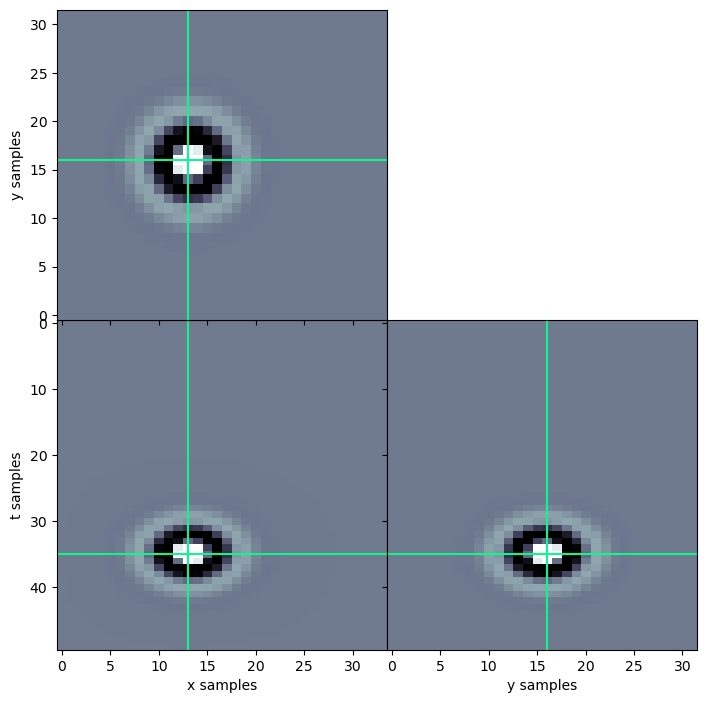

In [25]:
explode_volume(p_snaps_nopad[85], p=99.8,
               x=13, t=35, y=16)
#                tlim=[0, t[-1]], tlabel=r'$t$',
#                    xlim=[x[0]/1e3, x[-1]/1e3], xlabel=r'$x_r$',
#                    ylim=[y[0]/1e3, y[-1]/1e3], ylabel=r'$y_r$',
#                    labels= ('[s]', '[km]', '[km]'),
#                    clipval=(-0.5, 0.5), figsize=(8, 8), 
#                    title='Data')

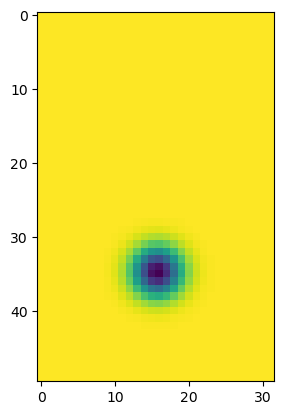

In [12]:
plt.imshow(p_snaps_nopad[84][:,25])

IndexError: index 520 is out of bounds for axis 0 with size 502

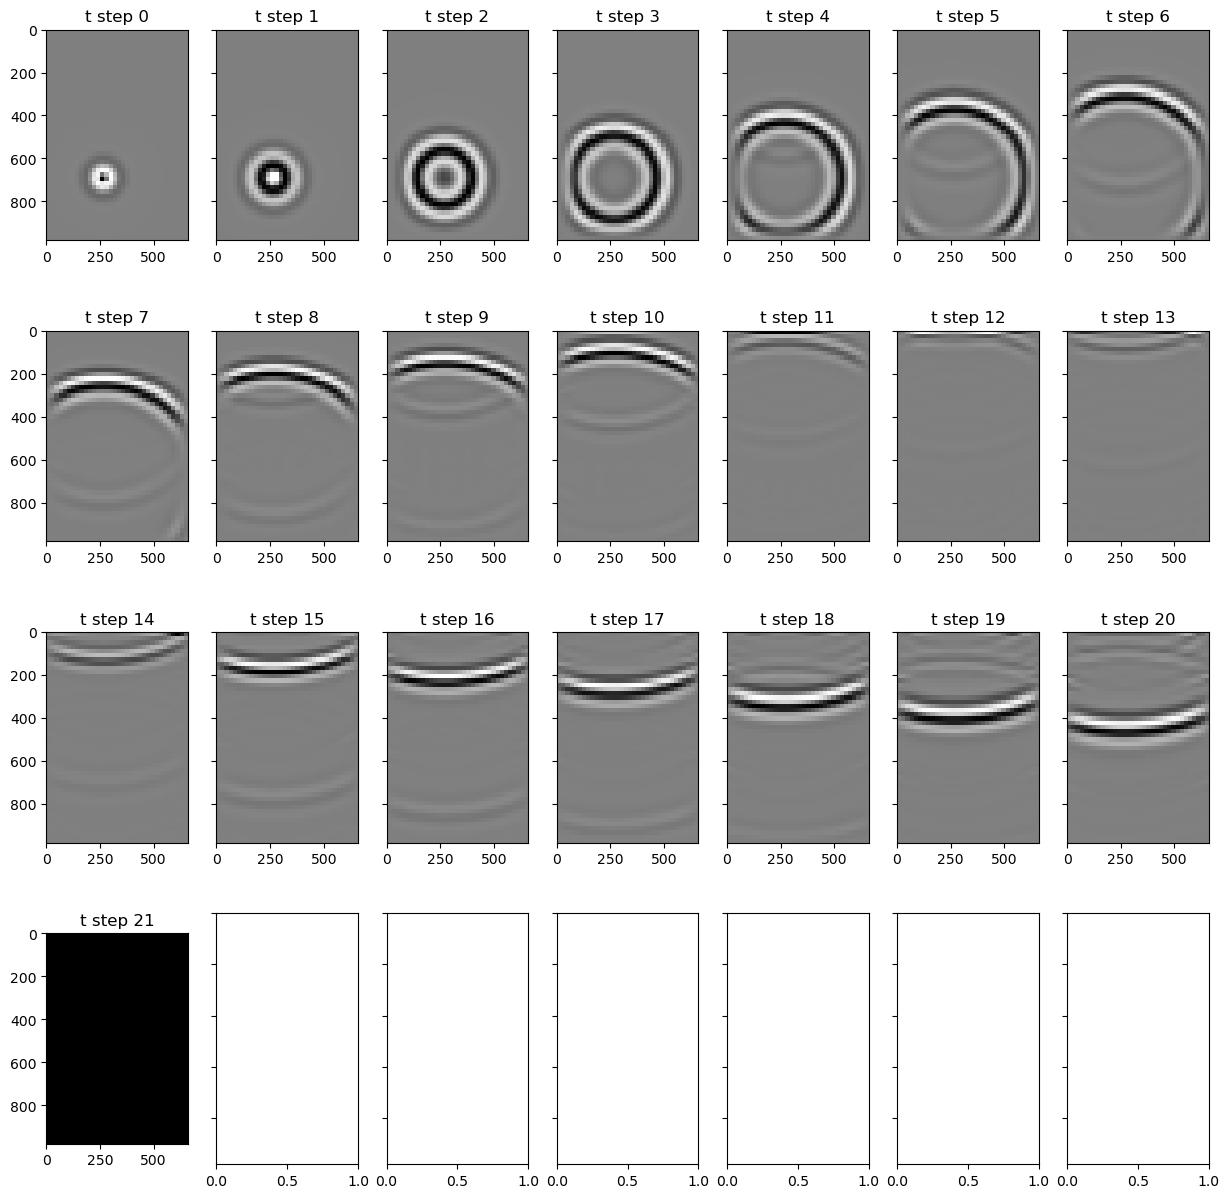

In [13]:
fig,axs = plt.subplots(4,7, figsize=[15,15], sharey=True)
for i,_ in enumerate(p_snaps_nopad[:4*7]):
    axs.ravel()[i].imshow(p_snaps_nopad[80+i*20,:,:,16]/np.max(abs(p_snaps_nopad[80+i*20,:,:,14])),  
                          cmap='binary', vmin=-1, vmax=1, 
                          extent=[y[0],y[-1],z[-1],z[0]]
                         )
    axs.ravel()[i].set_title('t step %i'%i)
# for ax in axs.ravel(): ax.set_yticks([]); ax.set_xticks([])
plt.tight_layout()

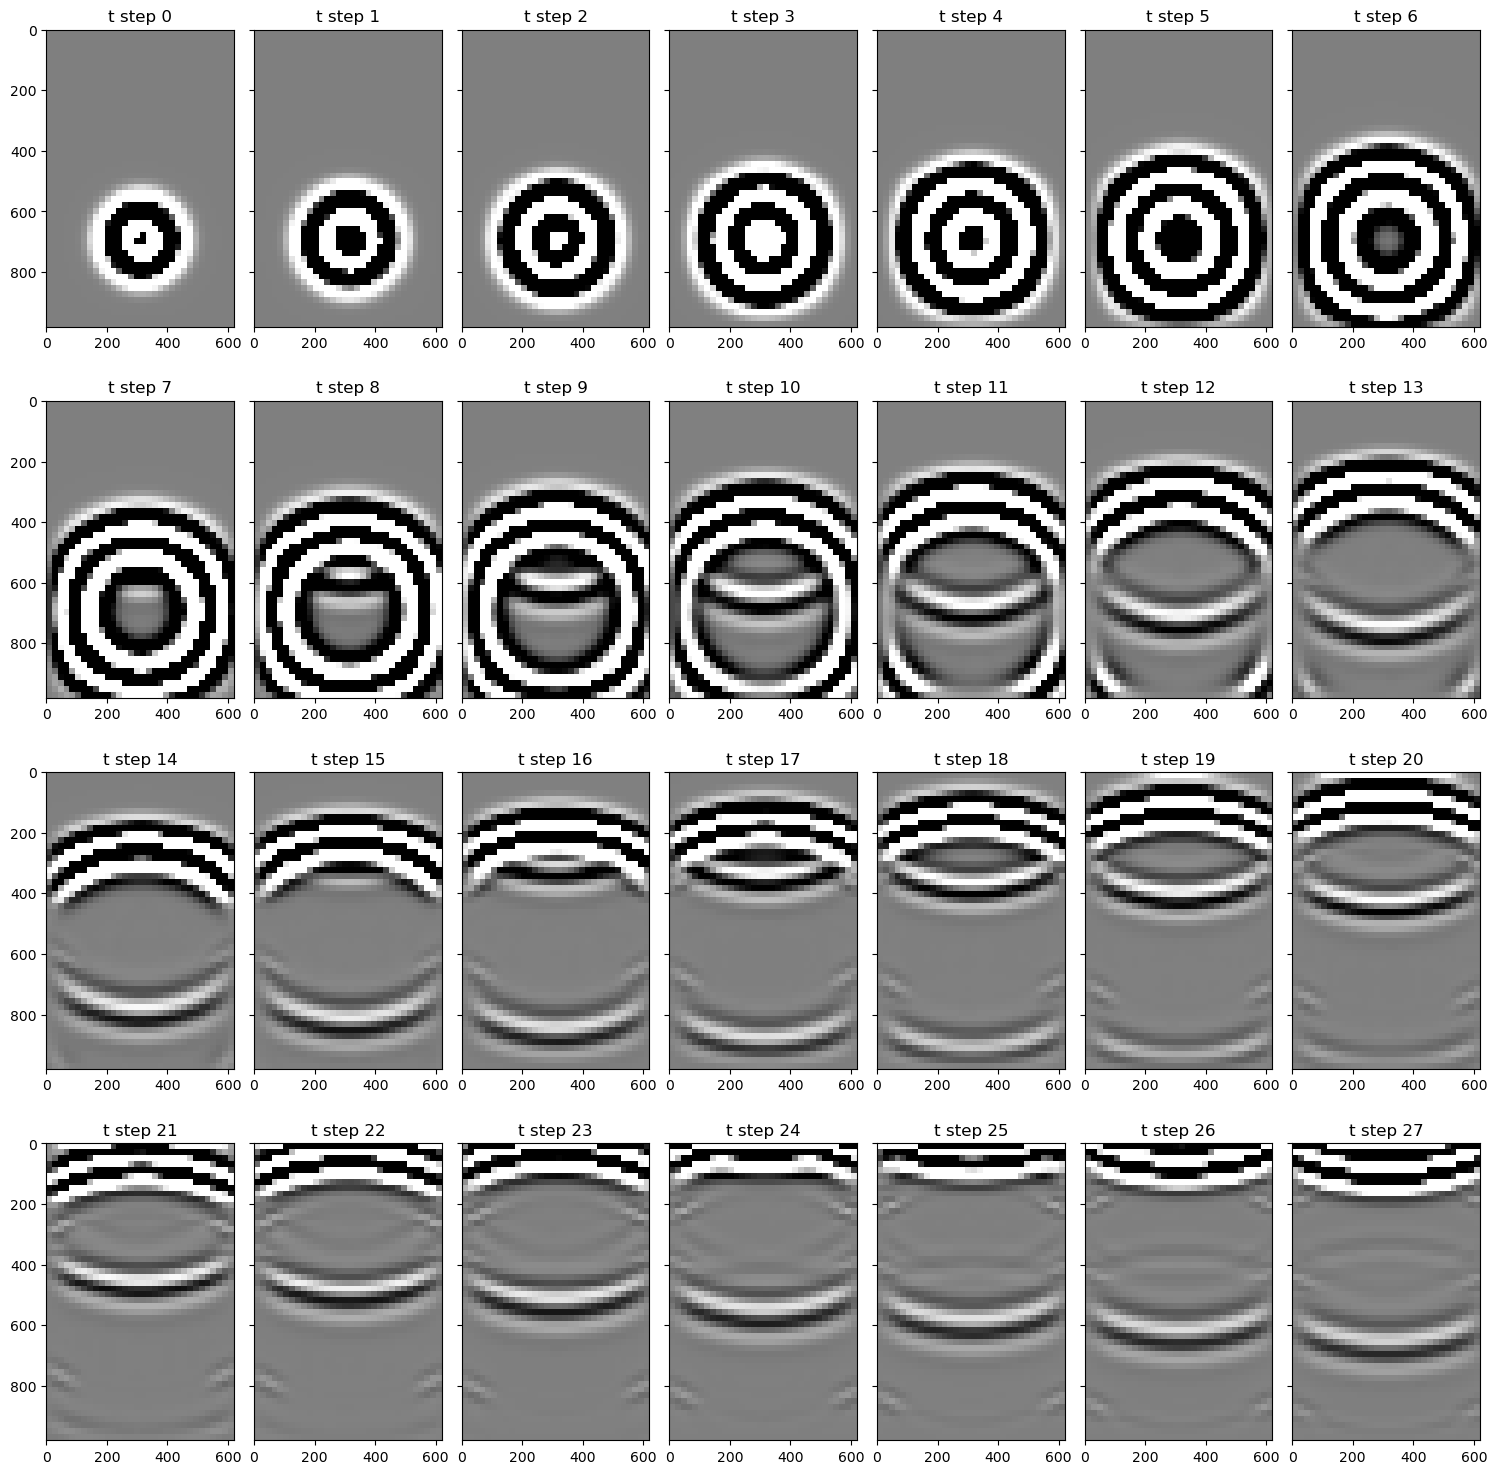

In [14]:
fig,axs = plt.subplots(4,7, figsize=[15,15], sharey=True)
for i,_ in enumerate(p_snaps_nopad[:4*7]):
    axs.ravel()[i].imshow(p_snaps_nopad[80+i*10,:,13,:],  cmap='binary', 
                          vmin=-1e-3, vmax=1e-3, 
                          extent=[x[0],x[-1],z[-1],z[0]]
                         )
    axs.ravel()[i].set_title('t step %i'%i)
# for ax in axs.ravel(): ax.set_yticks([]); ax.set_xticks([])
plt.tight_layout()

# DATA

In [21]:
data_path = '/home/birniece/Documents/Projects/MicroseismicModelling/MicroseismicProcessing/FDModelling/Simple3Layers/outputs/su'
vz_path = os.path.join(data_path,'simple3L_vy.txt')
# s_wave_file = os.path.join(data_path,'test.bin.curl')

In [22]:
nr = nrec
vz_flat = np.loadtxt(vz_path,delimiter="\n")
nt = int(vz_flat.shape[0]/nr)
print('nt:%i, nr:%i'%(nt,nr))
try: 
    vz_flat.reshape((nr,nt))
except:
    print('Not good dims \n nt:%i nr:%i \n vz flat:%i'%(nt,nr,vz_flat.shape[0]))
    
vz = vz_flat[:nt*nr].reshape((nr,nt))
print(np.max(vz))

nt:500, nr:80
4.576325e-11


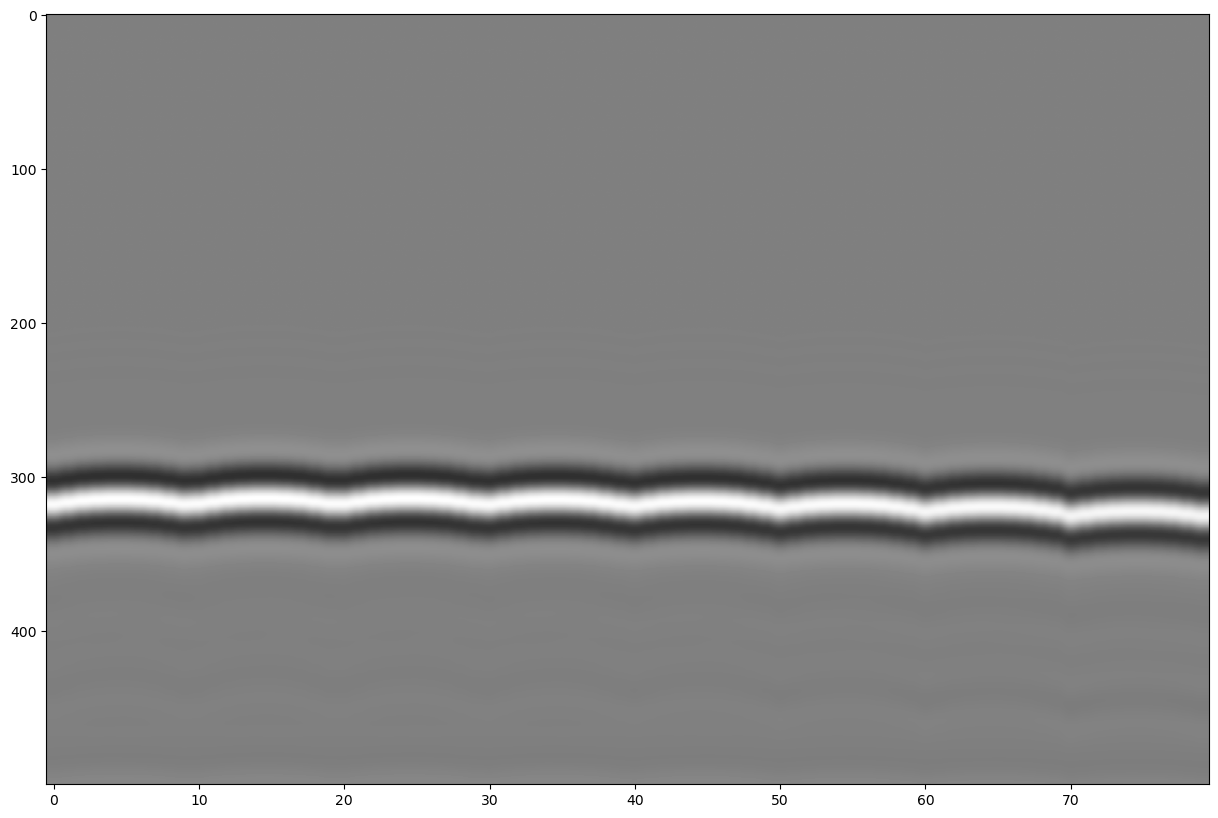

In [26]:
vlim=np.percentile(vz[:,:1500:4],99.5)
              
plt.figure(figsize=[15,10])
plt.imshow((vz/np.max(abs(vz))).T, aspect='auto', cmap='binary', vmin=-1, vmax=1)

In [ ]:
vz_flat = np.loadtxt(vz_path,delimiter="\n")
vz_flat[1050]